Data Mining - Kelompok 1
1. 2501974385 - Ricky Krisdianto
2. 2540128165 - Hossey Masada
3. 2540129855 - Ivana Apriani
4. 2540130365 - Celina Josephine
5. 2501984511 - Princessa Fortunata Fusanto
6. 2501977286 - Alden Ardiwinata Putra

Dataset: https://www.kaggle.com/datasets/mohaimenalrashid/invistico-airline

KDD Process:
1. Data Input
2. Data Preprocessing
3. Data Mining
4. Post-Processing
5. Pattern Information Knowledge

# Data Input

In [ ]:
# import main library
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# import library for machine learning and data mining utilities
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [ ]:
# set pandas utility
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
# warnings.filterwarnings('ignore')

In [ ]:
# import and read CSV dataset and input as dataframe (df)
df = pd.read_csv('/content/Invistico_Airline.csv')

# Data Preprocessing

In [ ]:
# check dataset size, metadata and a brief look into dataset
print("Dataset Size:", df.shape)
print(df.info())
df.head()

Dataset Size: (129880, 22)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129880 entries, 0 to 129879
Data columns (total 22 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   satisfaction                       129880 non-null  object 
 1   Customer Type                      129880 non-null  object 
 2   Age                                129880 non-null  int64  
 3   Type of Travel                     129880 non-null  object 
 4   Class                              129880 non-null  object 
 5   Flight Distance                    129880 non-null  int64  
 6   Seat comfort                       129880 non-null  int64  
 7   Departure/Arrival time convenient  129880 non-null  int64  
 8   Food and drink                     129880 non-null  int64  
 9   Gate location                      129880 non-null  int64  
 10  Inflight wifi service              129880 non-null  int64  
 11  Inflight ent

,satisfaction,Customer Type,Age,Type of Travel,Class,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,Gate location,Inflight wifi service,Inflight entertainment,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes
0,satisfied,Loyal Customer,65,Personal Travel,Eco,265,0,0,0,2,2,4,2,3,3,0,3,5,3,2,0,0.0
1,satisfied,Loyal Customer,47,Personal Travel,Business,2464,0,0,0,3,0,2,2,3,4,4,4,2,3,2,310,305.0
2,satisfied,Loyal Customer,15,Personal Travel,Eco,2138,0,0,0,3,2,0,2,2,3,3,4,4,4,2,0,0.0
3,satisfied,Loyal Customer,60,Personal Travel,Eco,623,0,0,0,3,3,4,3,1,1,0,1,4,1,3,0,0.0
4,satisfied,Loyal Customer,70,Personal Travel,Eco,354,0,0,0,3,4,3,4,2,2,0,2,4,2,5,0,0.0


In [ ]:
# check for missing value
df.isna().sum()

satisfaction                           0
Customer Type                          0
Age                                    0
Type of Travel                         0
Class                                  0
Flight Distance                        0
Seat comfort                           0
Departure/Arrival time convenient      0
Food and drink                         0
Gate location                          0
Inflight wifi service                  0
Inflight entertainment                 0
Online support                         0
Ease of Online booking                 0
On-board service                       0
Leg room service                       0
Baggage handling                       0
Checkin service                        0
Cleanliness                            0
Online boarding                        0
Departure Delay in Minutes             0
Arrival Delay in Minutes             393
dtype: int64

In [ ]:
# eliminate missing value
df = df.dropna()
df.shape

(129487, 22)

In [ ]:
# check uniquity and any imbalance properties in dataset
print(df.nunique(), "\n")
features = df.columns

features = features.drop('Age')
features = features.drop('Flight Distance')
features = features.drop('Departure Delay in Minutes')
features = features.drop('Arrival Delay in Minutes')

for feature in features:
  print(df[(feature)].value_counts(), "\n")

satisfaction                            2
Customer Type                           2
Age                                    75
Type of Travel                          2
Class                                   3
Flight Distance                      5397
Seat comfort                            6
Departure/Arrival time convenient       6
Food and drink                          6
Gate location                           6
Inflight wifi service                   6
Inflight entertainment                  6
Online support                          6
Ease of Online booking                  6
On-board service                        6
Leg room service                        6
Baggage handling                        5
Checkin service                         6
Cleanliness                             6
Online boarding                         6
Departure Delay in Minutes            464
Arrival Delay in Minutes              472
dtype: int64 

satisfied       70882
dissatisfied    58605
Name: satisfactio

In [ ]:
# convert categorical feature into numerical feature
encoder = LabelEncoder()
df['satisfaction'] = encoder.fit_transform(df['satisfaction'])
df['Customer Type'] = encoder.fit_transform(df['Customer Type'])
df['Type of Travel'] = encoder.fit_transform(df['Type of Travel'])
df['Class'] = encoder.fit_transform(df['Class'])

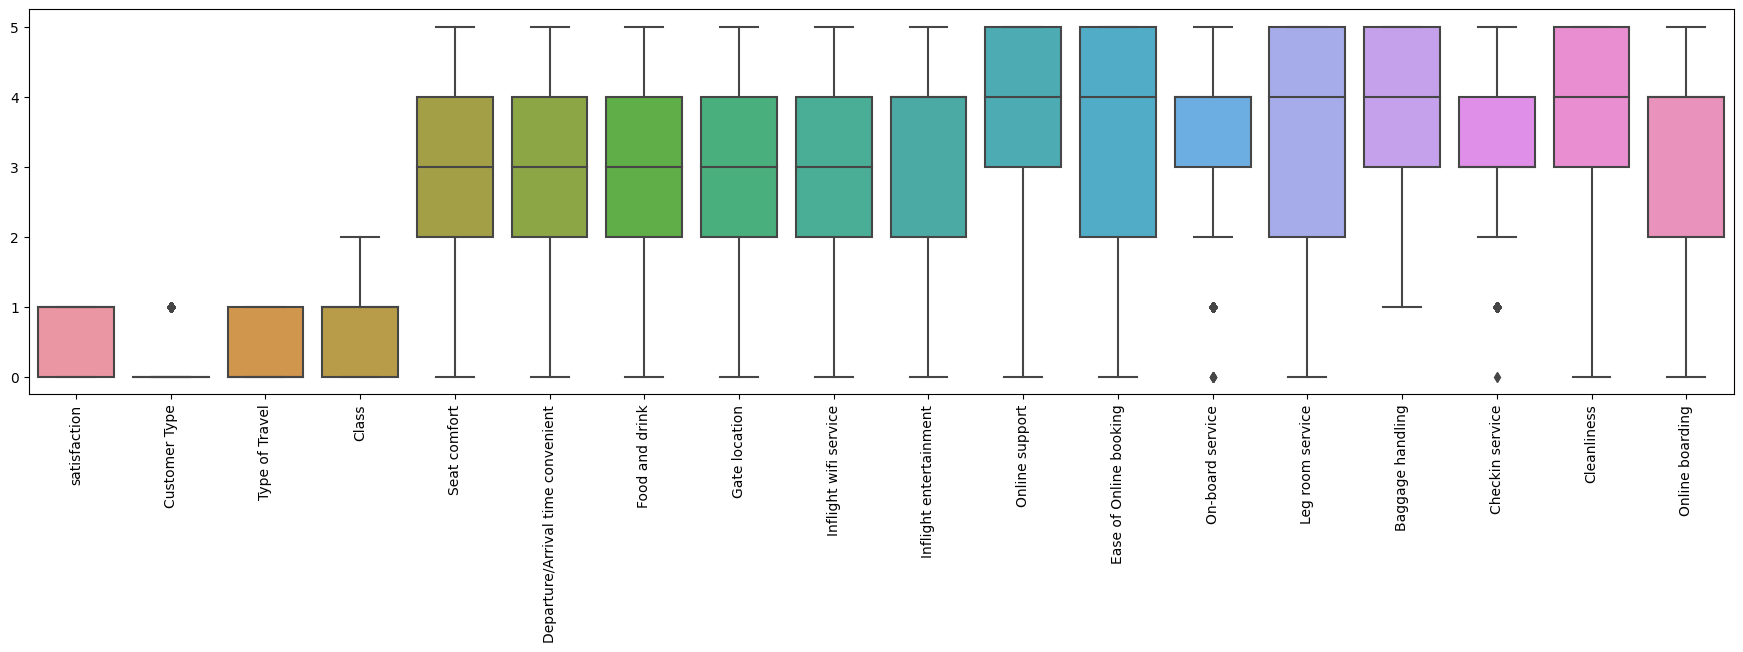

In [ ]:
# outlier analysis in dataset
plt.figure(figsize=(22,5))
db = df

db = db.drop(columns='Flight Distance')
db = db.drop(columns='Departure Delay in Minutes')
db = db.drop(columns='Arrival Delay in Minutes')
db = db.drop(columns='Age')

bp = sns.boxplot(db)
bp.set_xticklabels(bp.get_xticklabels(), rotation=90)
plt.show()

<Axes: >

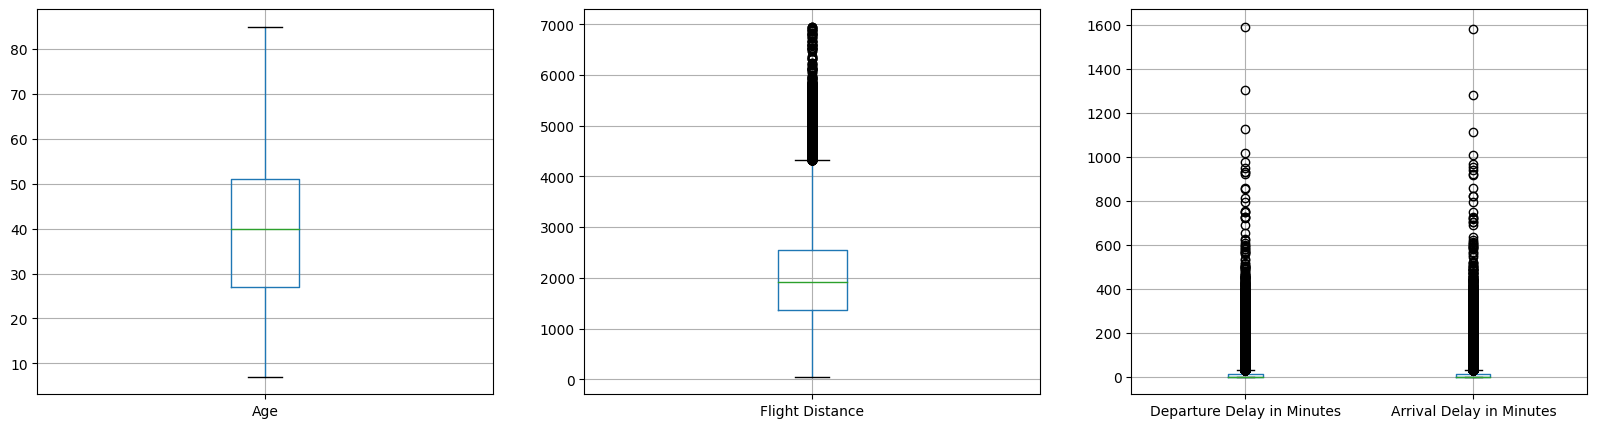

In [ ]:
plt.figure(figsize=(20,5))
plt.subplot(1, 3, 1)
df[['Age']].boxplot()
plt.subplot(1, 3, 2)
df[['Flight Distance']].boxplot()
plt.subplot(1, 3, 3)
df[['Departure Delay in Minutes', 'Arrival Delay in Minutes']].boxplot()

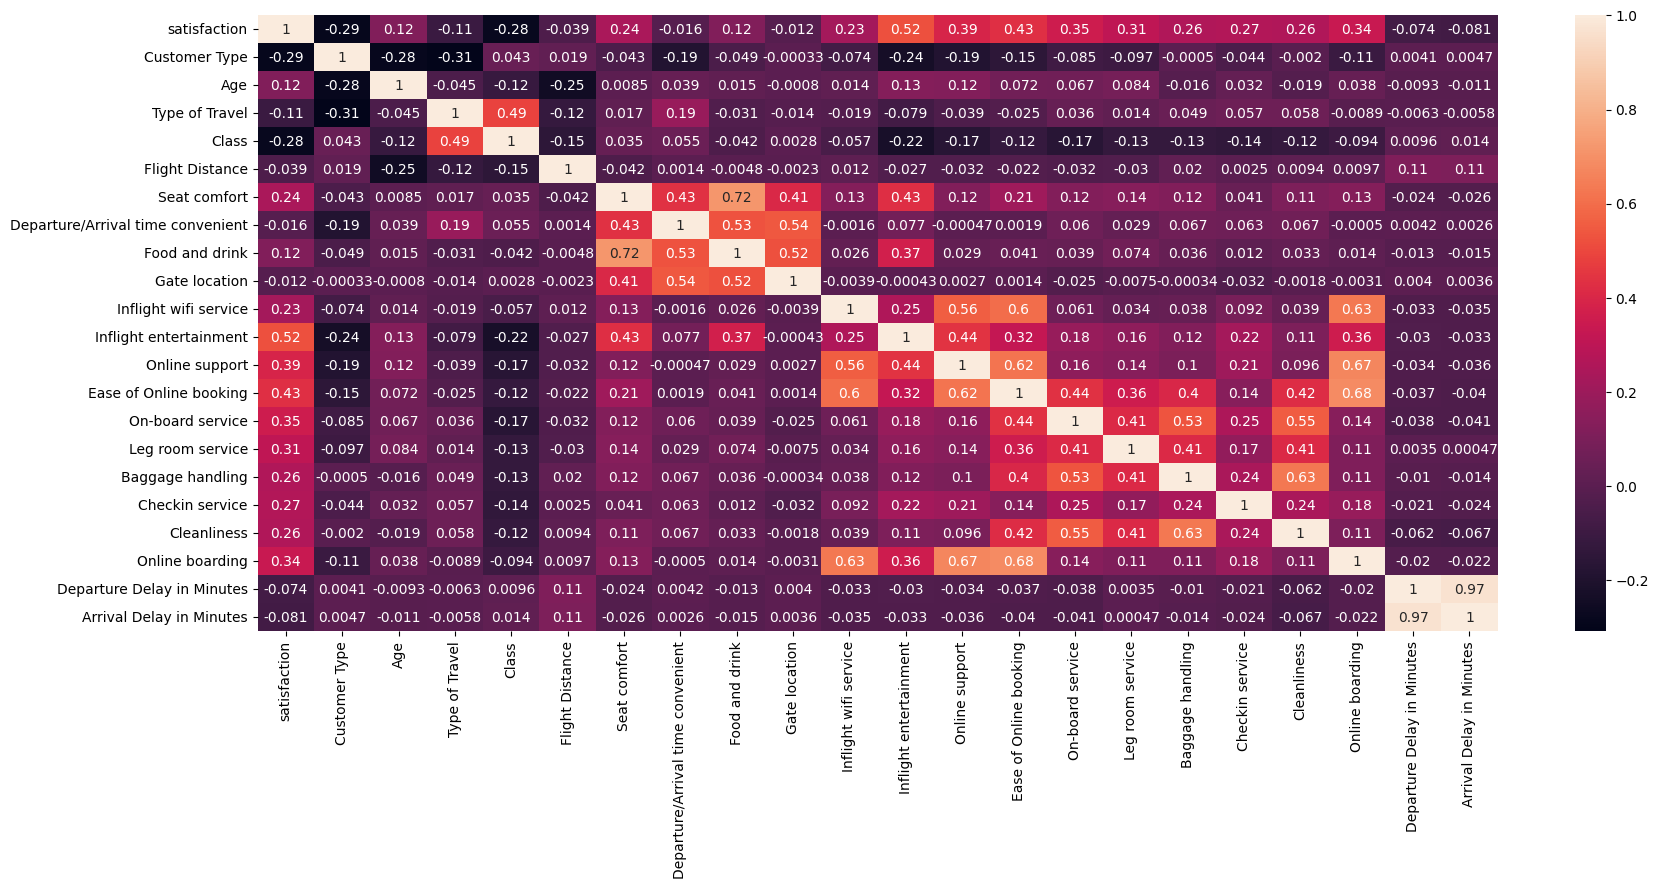

In [ ]:
# check features correlation matrix
plt.figure(figsize=(20,8))
sns.heatmap(df.corr(), annot=True)
plt.show()

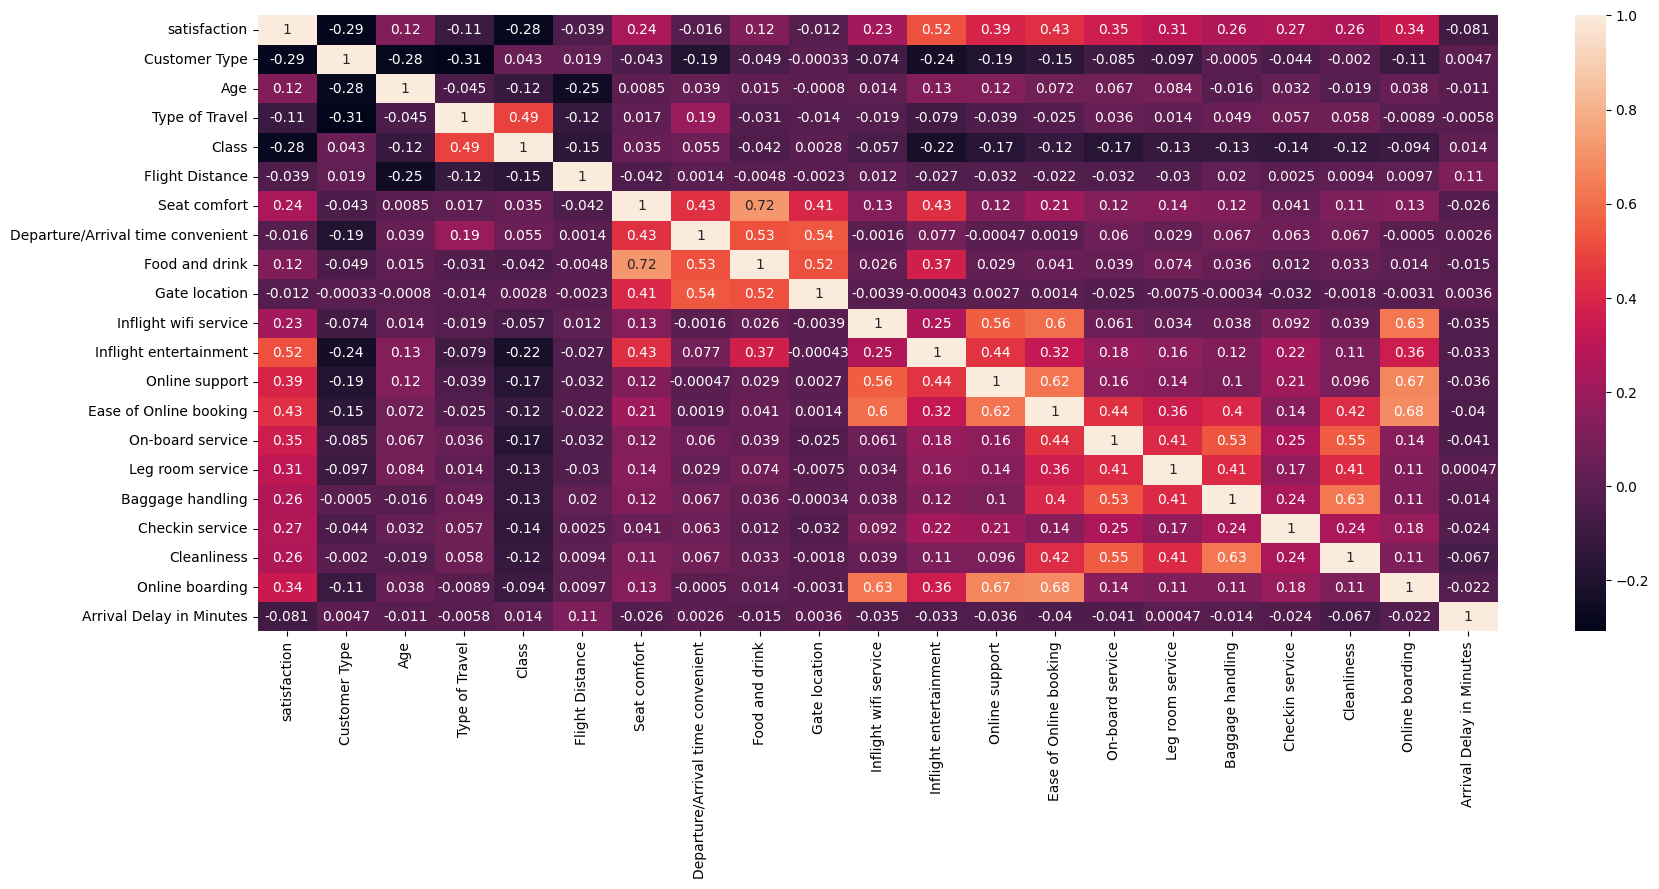

In [ ]:
# drop the highly correlated features
df.drop('Departure Delay in Minutes', axis=1, inplace=True)

plt.figure(figsize=(20,8))
sns.heatmap(df.corr(), annot=True)
plt.show()

In [ ]:
# final 5 numbers summary
df.describe()

,satisfaction,Customer Type,Age,Type of Travel,Class,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,Gate location,Inflight wifi service,Inflight entertainment,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Arrival Delay in Minutes
count,129487.000000,129487.000000,129487.000000,129487.000000,129487.000000,129487.000000,129487.000000,129487.000000,129487.000000,129487.000000,129487.000000,129487.000000,129487.000000,129487.000000,129487.000000,129487.000000,129487.000000,129487.000000,129487.000000,129487.000000,129487.000000
mean,0.547406,0.183138,39.428761,0.309236,0.593704,1981.008974,2.838586,2.990277,2.852024,2.990377,3.249160,3.383745,3.519967,3.472171,3.465143,3.486118,3.695460,3.340729,3.705886,3.352545,15.091129
std,0.497749,0.386781,15.117597,0.462180,0.621371,1026.884131,1.392873,1.527183,1.443587,1.305917,1.318765,1.345959,1.306326,1.305573,1.270755,1.292079,1.156487,1.260561,1.151683,1.298624,38.465650
min,0.000000,0.000000,7.000000,0.000000,0.000000,50.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,27.000000,0.000000,0.000000,1359.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,2.000000,3.000000,2.000000,3.000000,3.000000,3.000000,2.000000,0.000000
50%,1.000000,0.000000,40.000000,0.000000,1.000000,1924.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,4.000000,0.000000
75%,1.000000,0.000000,51.000000,1.000000,1.000000,2543.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,5.000000,4.000000,5.000000,5.000000,4.000000,5.000000,4.000000,13.000000
max,1.000000,1.000000,85.000000,1.000000,2.000000,6951.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,1584.000000


# Data Mining

In [ ]:
# preparation for machine learning model (normalization by standard scaler and test split)
x = df.drop('satisfaction', axis=1) # features
y = df['satisfaction'] # target

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

x_train

array([[ 2.11476084, -1.21903868, -0.66826021, ...,  0.25590362,
         1.26904953, -0.2639535 ],
       [-0.47286671,  1.22745346, -0.66826021, ...,  1.12575758,
         1.26904953, -0.39493727],
       [-0.47286671,  0.1033895 , -0.66826021, ..., -0.61395035,
         0.49833755, -0.39493727],
       ...,
       [-0.47286671,  0.30175373,  1.49642308, ...,  0.25590362,
        -1.81379838, -0.15916648],
       [-0.47286671, -1.81413137,  1.49642308, ...,  0.25590362,
        -1.81379838, -0.29015025],
       [-0.47286671, -0.623946  , -0.66826021, ...,  1.12575758,
         1.26904953, -0.39493727]])

In [ ]:
# create SVM model
SVM_model = SVC(kernel='linear', C=1.0, random_state=42, verbose=True)

In [ ]:
# set hyperparameter for cross-validation (window = 5)
crossValidation = cross_val_score(SVM_model, x_train, y_train, cv=5)

[LibSVM][LibSVM][LibSVM][LibSVM][LibSVM]

In [ ]:
print("Cross-validation Score: ", crossValidation)

Cross-validation Score:  [0.83260933 0.83516749 0.8332368  0.83299546 0.83168412]


In [ ]:
print("Overall Accuracy: ", format(crossValidation.mean()))

Overall Accuracy:  0.8331386396768428


In [ ]:
# model fitting and predict test data
SVM_model.fit(x_train, y_train)
y_pred = SVM_model.predict(x_test)

[LibSVM]

# Post-Processing

Prediction Accuracy:  0.8335778824619662
Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.83      0.82     11821
           1       0.85      0.84      0.85     14077

    accuracy                           0.83     25898
   macro avg       0.83      0.83      0.83     25898
weighted avg       0.83      0.83      0.83     25898

Model Accuracy:  0.8335778824619662


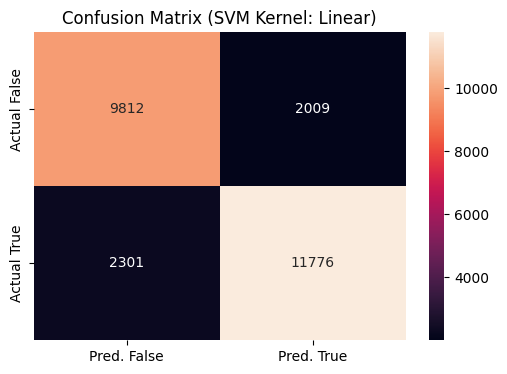

In [ ]:
# model report
accuracy = accuracy_score(y_test, y_pred)
print('Prediction Accuracy: ', accuracy)

report = classification_report(y_test, y_pred)
print('Classification Report:\n', report)

modelAccuracy = SVM_model.score(x_test, y_test)
print('Model Accuracy: ', format(modelAccuracy))

conf_matrix = confusion_matrix(y_test, y_pred)
conf_df = pd.DataFrame(conf_matrix, index=['Actual False', 'Actual True'], columns=['Pred. False', 'Pred. True'])

plt.figure(figsize=(6, 4))
plt.title('Confusion Matrix (SVM Kernel: Linear)')
sns.heatmap(conf_df, annot=True, fmt='g')
plt.show()

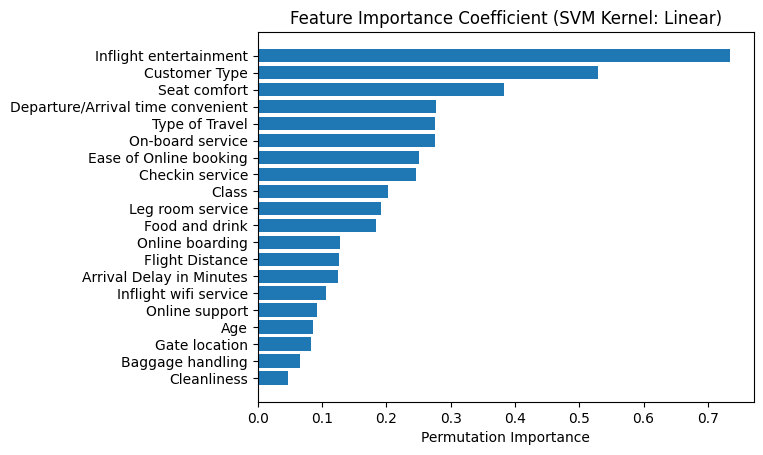

In [ ]:
# feature weight (permutation importance coefficient of each feature)
features = np.array(['Customer Type', 'Age', 'Type of Travel', 'Class', 'Flight Distance',
                     'Seat comfort', 'Departure/Arrival time convenient', 'Food and drink',
                     'Gate location', 'Inflight wifi service', 'Inflight entertainment',
                     'Online support', 'Ease of Online booking', 'On-board service',
                     'Leg room service', 'Baggage handling', 'Checkin service', 'Cleanliness',
                     'Online boarding', 'Arrival Delay in Minutes'])

def importance(coef, feat, top=-1):
  temp = coef
  temp, feat = zip(*sorted(list(zip(temp, feat))))

  if top == -1:
    top = len(feat)

  plt.title("Feature Importance Coefficient (SVM Kernel: Linear)")
  plt.barh(range(top), temp[::1][0:top], align='center')
  plt.yticks(range(top), feat[::1][0:top])
  plt.xlabel("Permutation Importance")
  plt.show()

importance(abs(SVM_model.coef_[0]), features, top=20)